## Load Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(color_codes=True)
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('../dataset/flight.csv') #disesuaikan denagn path pada masing-masing
df.shape

(62988, 23)

In [3]:
df.sample(5)

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
29563,9954,12/27/2006,4/20/2007,Male,4,guangzhou,guangdong,CN,35.0,3/31/2014,8,5162,1652.0,5914.0,11926,3/31/2014,1,83.571429,208,0,0.640547,5162,0
31878,16896,5/2/2011,5/2/2011,Male,4,dalian,liaoning,CN,40.0,3/31/2014,2,5772,6150.0,0.0,4570,10/4/2012,545,1.000000,1,1,1.500000,5772,1
28725,41898,9/20/2011,9/23/2011,Male,4,beijing,beijing,CN,33.0,3/31/2014,4,8081,1700.0,5199.0,8507,12/2/2013,121,108.666667,234,0,0.932679,8081,0
20495,27097,5/11/2012,6/14/2012,Female,4,changsha,hunan,CN,61.0,3/31/2014,15,10896,3780.0,6942.0,18592,10/7/2013,177,34.285714,133,0,0.642712,12896,1
57792,57058,2/23/2008,2/23/2008,Male,4,beijing,beijing,CN,49.0,3/31/2014,2,1522,864.0,0.0,2298,12/11/2012,477,28.000000,28,0,0.697476,1522,0


## Nomor 1

### Bagian A

#### Pengecekan Tipe Data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62988 entries, 0 to 62987
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MEMBER_NO          62988 non-null  int64  
 1   FFP_DATE           62988 non-null  object 
 2   FIRST_FLIGHT_DATE  62988 non-null  object 
 3   GENDER             62985 non-null  object 
 4   FFP_TIER           62988 non-null  int64  
 5   WORK_CITY          60719 non-null  object 
 6   WORK_PROVINCE      59740 non-null  object 
 7   WORK_COUNTRY       62962 non-null  object 
 8   AGE                62568 non-null  float64
 9   LOAD_TIME          62988 non-null  object 
 10  FLIGHT_COUNT       62988 non-null  int64  
 11  BP_SUM             62988 non-null  int64  
 12  SUM_YR_1           62437 non-null  float64
 13  SUM_YR_2           62850 non-null  float64
 14  SEG_KM_SUM         62988 non-null  int64  
 15  LAST_FLIGHT_DATE   62988 non-null  object 
 16  LAST_TO_END        629

Terdapat ketidaksesuaian tipe data date yang ternyata adalah tipe data object diantaranya adalah:
1. FFP_DATE
2. FIRST_FLIGHT_DATE
3. LAST_FLIGHT_DATE
4. LOAD_TIME

Terhadap tipe data yang tidak sesuai maka perlu dilakukan penyesuian yaitu dengan merubah tipe data object menjadi date

In [5]:
df['FFP_DATE'] = pd.to_datetime(df['FFP_DATE'],  errors='coerce')
df['FIRST_FLIGHT_DATE'] = pd.to_datetime(df['FIRST_FLIGHT_DATE'], errors='coerce')
df['LAST_FLIGHT_DATE'] = pd.to_datetime(df['LAST_FLIGHT_DATE'],  errors='coerce')
df['LOAD_TIME'] = pd.to_datetime(df['LOAD_TIME'], errors='coerce')

#### Pengecekan Data Kosong

In [6]:
df.isna().sum()

MEMBER_NO               0
FFP_DATE                0
FIRST_FLIGHT_DATE       0
GENDER                  3
FFP_TIER                0
WORK_CITY            2269
WORK_PROVINCE        3248
WORK_COUNTRY           26
AGE                   420
LOAD_TIME               0
FLIGHT_COUNT            0
BP_SUM                  0
SUM_YR_1              551
SUM_YR_2              138
SEG_KM_SUM              0
LAST_FLIGHT_DATE      421
LAST_TO_END             0
AVG_INTERVAL            0
MAX_INTERVAL            0
EXCHANGE_COUNT          0
avg_discount            0
Points_Sum              0
Point_NotFlight         0
dtype: int64

Terdapat banyak data yang kosong diantaranya ada pada kolom:
1. WORK_CITY     =        2269
2. WORK_PROVINCE =        3248
3. WORK_COUNTRY  =        26
4. AGE           =        420
5. SUM_YR_1      =        551
6. SUM_YR_2      =        138

Untuk data kosong ini akan di drop.

In [7]:
df = df.dropna()
df.isna().sum()

MEMBER_NO            0
FFP_DATE             0
FIRST_FLIGHT_DATE    0
GENDER               0
FFP_TIER             0
WORK_CITY            0
WORK_PROVINCE        0
WORK_COUNTRY         0
AGE                  0
LOAD_TIME            0
FLIGHT_COUNT         0
BP_SUM               0
SUM_YR_1             0
SUM_YR_2             0
SEG_KM_SUM           0
LAST_FLIGHT_DATE     0
LAST_TO_END          0
AVG_INTERVAL         0
MAX_INTERVAL         0
EXCHANGE_COUNT       0
avg_discount         0
Points_Sum           0
Point_NotFlight      0
dtype: int64

#### Pengecekan Data Duplikat

In [8]:
df.duplicated(subset='MEMBER_NO').sum()

0

Dapat dilihat, tidak terdapat data duplikat

### Bagian B

#### Melihat Statistik Kolom

In [9]:
cats = ["GENDER", "WORK_CITY", "WORK_PROVINCE", "WORK_COUNTRY"]
nums = ["FFP_TIER", "AGE", "FLIGHT_COUNT", "BP_SUM", "SUM_YR_1", "SUM_YR_2", "SEG_KM_SUM", "LAST_TO_END",
        "AVG_INTERVAL", "MAX_INTERVAL", "EXCHANGE_COUNT", "avg_discount", "Points_Sum", "Point_NotFlight"]
date = ["FFP_DATE", "FIRST_FLIGHT_DATE", "LAST_FLIGHT_DATE", "LOAD_TIME"]

In [10]:
df[cats].describe()

,GENDER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY
count,57860,57860,57860,57860
unique,2,2935,1123,105
top,Male,guangzhou,guangdong,CN
freq,44127,9223,17215,54572


In [11]:
df[nums].describe()

,FFP_TIER,AGE,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
count,57860.000000,57860.000000,57860.000000,57860.000000,57860.000000,57860.000000,57860.000000,57860.00000,57860.000000,57860.000000,57860.000000,57860.000000,57860.000000,57860.000000
mean,4.104666,42.233253,12.043000,11047.843726,5363.816955,5679.279658,17324.371863,172.20598,67.963638,167.221673,0.327981,0.720626,12721.368960,2.819703
std,0.378206,9.763364,14.239523,16294.179086,8110.434363,8714.783954,20982.734648,180.80718,77.533059,122.901236,1.149762,0.183942,20621.601695,7.497873
min,4.000000,6.000000,2.000000,0.000000,0.000000,0.000000,368.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,35.000000,3.000000,2599.750000,1020.000000,833.000000,4882.000000,28.00000,23.666667,81.000000,0.000000,0.612019,2863.000000,0.000000
50%,4.000000,41.000000,7.000000,5814.000000,2804.000000,2830.000000,10208.000000,105.00000,44.812500,144.000000,0.000000,0.711429,6468.000000,0.000000
75%,4.000000,48.000000,15.000000,12976.250000,6584.000000,6931.000000,21519.000000,259.25000,82.000000,228.000000,0.000000,0.808333,14491.000000,1.000000
max,6.000000,110.000000,213.000000,505308.000000,239560.000000,234188.000000,580717.000000,731.00000,728.000000,728.000000,46.000000,1.500000,985572.000000,140.000000


In [12]:
df[date].describe()

,FFP_DATE,FIRST_FLIGHT_DATE,LAST_FLIGHT_DATE,LOAD_TIME
count,57860,57860,57860,57860
mean,2010-03-31 08:34:34.635326720,2010-09-24 06:33:50.833045248,2013-10-11 12:36:09.706187264,2014-03-31 00:00:00.000000256
min,2004-11-01 00:00:00,1905-12-31 00:00:00,2012-04-01 00:00:00,2014-03-31 00:00:00
25%,2008-05-06 00:00:00,2009-01-22 00:00:00,2013-07-16 18:00:00,2014-03-31 00:00:00
50%,2010-11-17 00:00:00,2011-05-25 00:00:00,2013-12-18 00:00:00,2014-03-31 00:00:00
75%,2012-04-09 00:00:00,2012-08-04 00:00:00,2014-03-04 00:00:00,2014-03-31 00:00:00
max,2013-03-31 00:00:00,2015-04-03 00:00:00,2014-03-31 00:00:00,2014-03-31 00:00:00


#### Melihat Distribusi Kolom Numerik

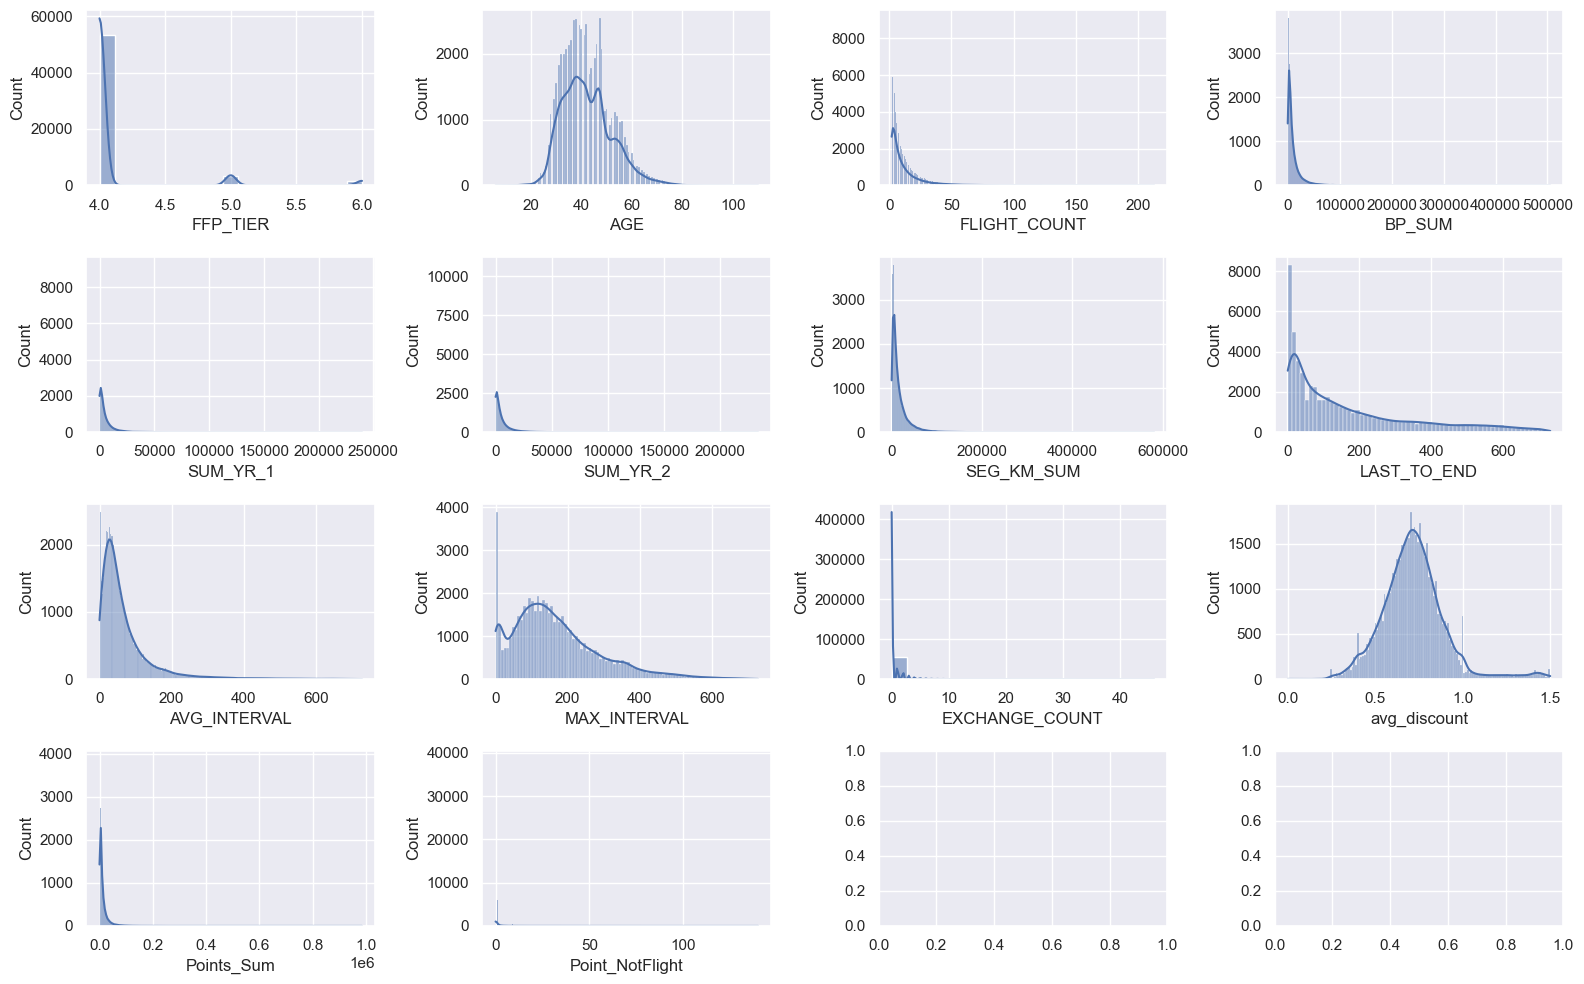

In [13]:
fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(16, 10))
axs = axs.flatten()

for i, var in enumerate(nums):
    sns.histplot(x=var, data=df, kde=True, ax=axs[i])

fig.tight_layout()

plt.show()

#### Melihat Distribusi Kolom Kategorikal

##### Gender

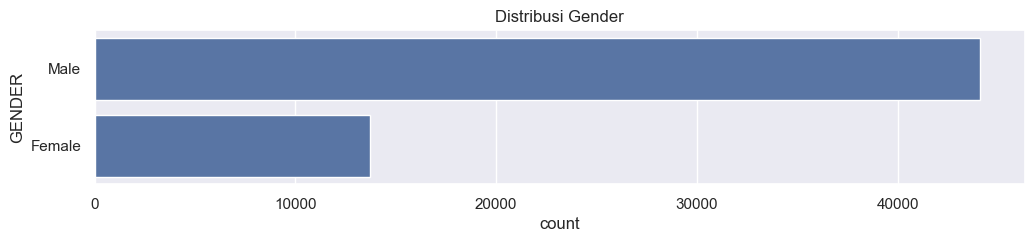

In [14]:
plt.figure(figsize=(12, 2))
sns.countplot(data=df, y='GENDER', order=df['GENDER'].value_counts().index)
plt.title('Distribusi Gender')
plt.show()

##### Kategorikal Top 20

Kolom kategorikal "WORK_CITY", "WORK_PROVINCE", dan "WORK_COUNTRY" memiliki jumlah unique value yang cukup banyak, maka dari hanya akan ditampilkan top 20 teratas saja

In [15]:
def plot_categorical(cat_column):
    top_n_values = df[cat_column].value_counts().nlargest(20).index
    
    # Membuat dataframe yang berisi hanya data dengan top 20 nilai unik
    df_filtered = df[df[cat_column].isin(top_n_values)]

    # Visualisasi data kategorikal yang telah difilter
    plt.figure(figsize=(15, 4))
    sns.countplot(data=df_filtered, x=cat_column)
    plt.title(f'Distribusi {cat_column} (Top 20)')
    plt.xticks(rotation=45)
    plt.show()

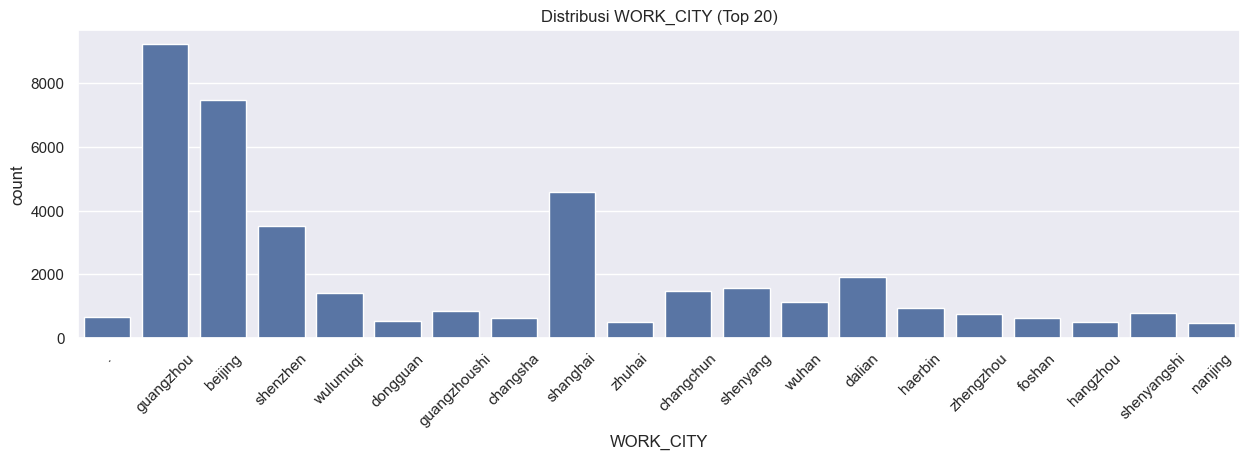

In [16]:
plot_categorical("WORK_CITY")

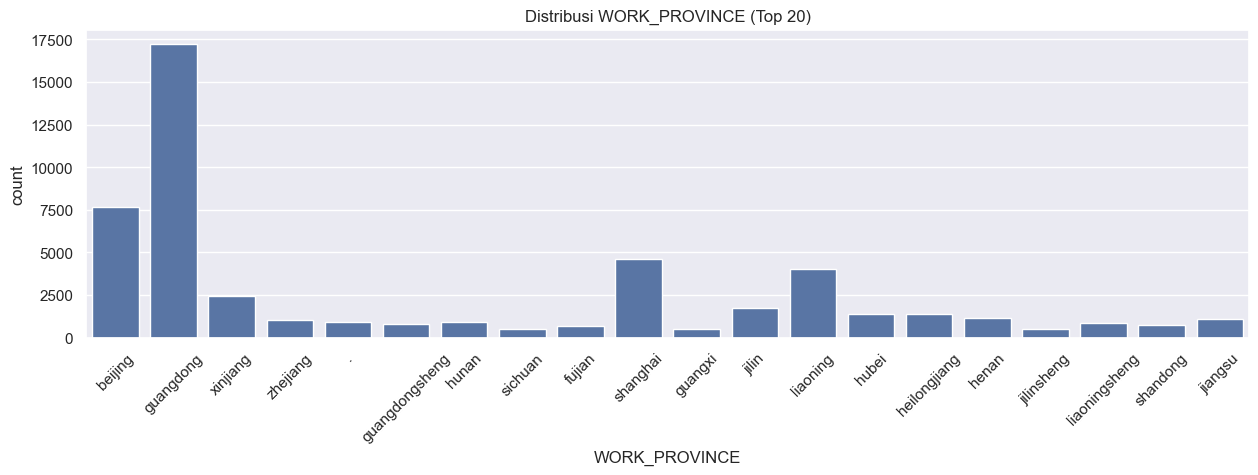

In [17]:
plot_categorical("WORK_PROVINCE")

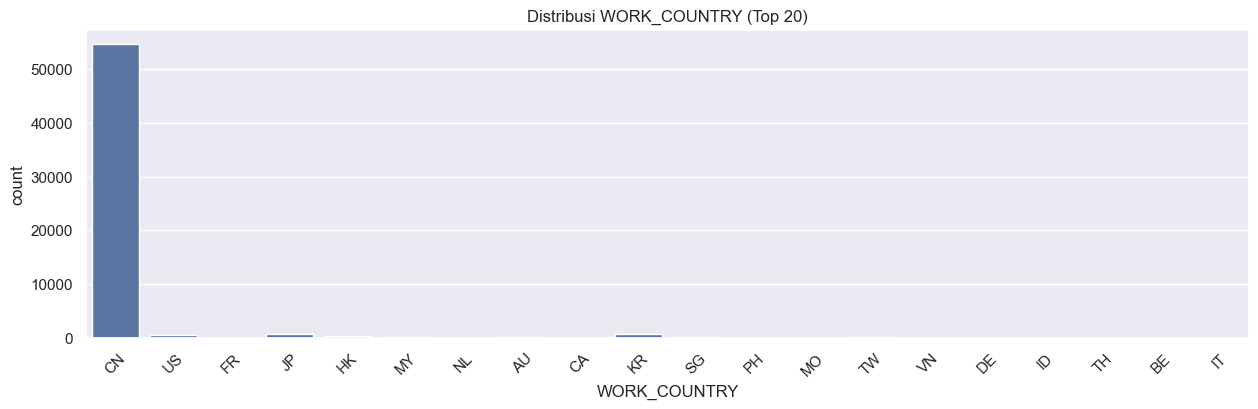

In [18]:
plot_categorical("WORK_COUNTRY")

#### Melihat Distribusi Kolom Datetime

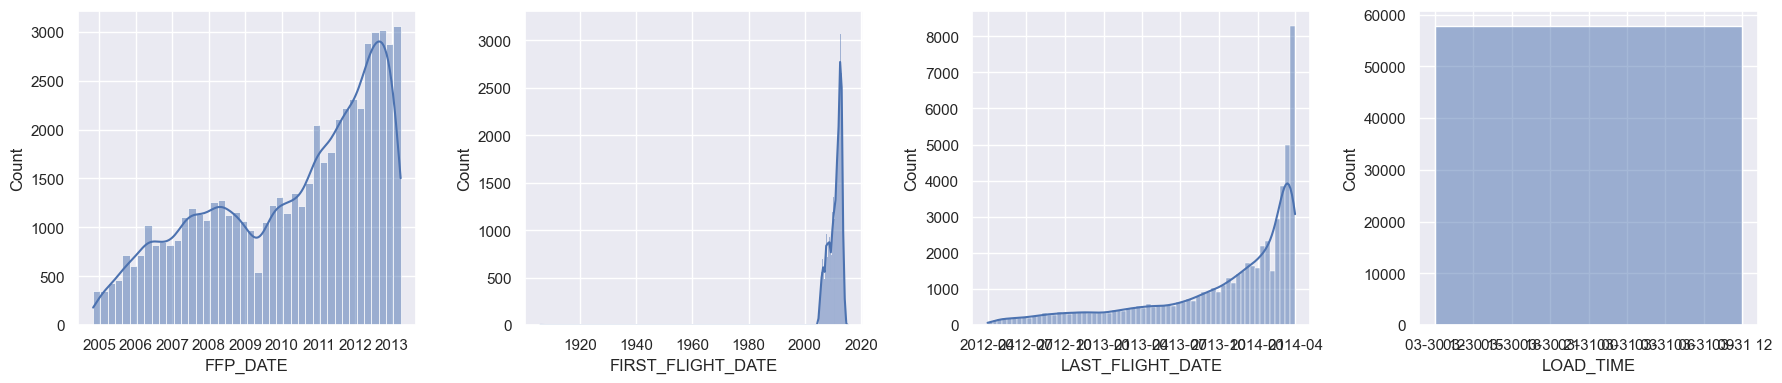

In [19]:
fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(18, 4))
axs = axs.flatten()

for i, var in enumerate(date):
    sns.histplot(x=var, data=df, kde=True, ax=axs[i])

fig.tight_layout()

plt.show()

Dapat terlihat dari grafik diatas bahwa terjadi kenaikan trend setiap tahunnya.

### Bagian C

#### Analisa Multivariate

<Axes: >

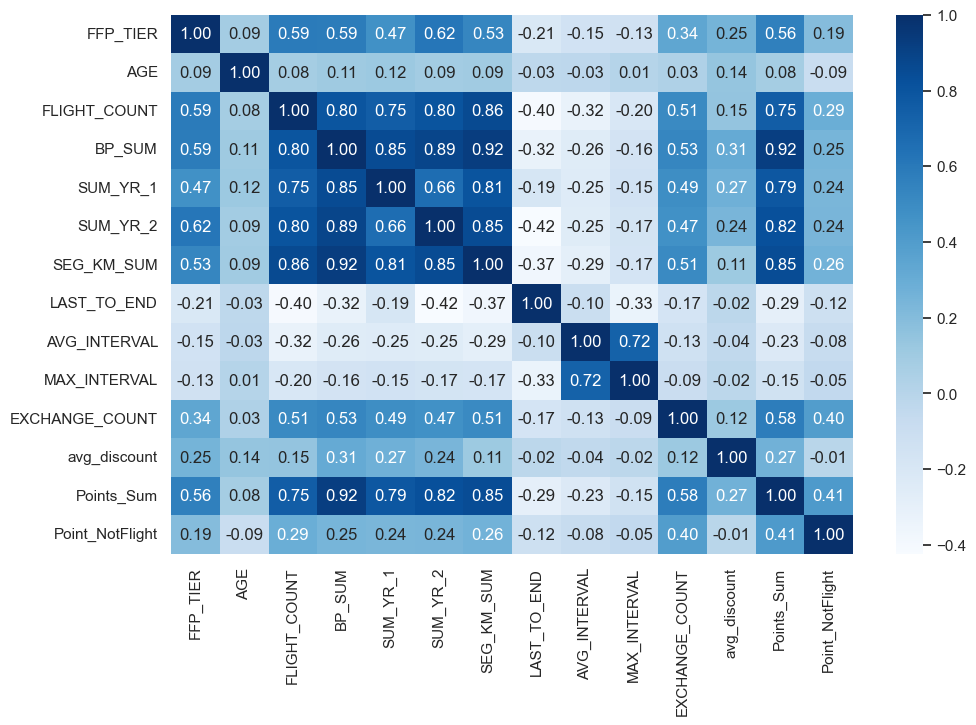

In [20]:
plt.figure(figsize=(11, 7))
sns.heatmap(df[nums].corr(), cmap='Blues', annot=True, fmt='.2f')

Terdapat beberapa fitur yang memiliki korelasi yang besar, maka untuk fitur-fitur yang memiliki nilai korelasi diatas 0.80 untuk bisa langsung dieliminasi salah satunya sehingga didapatkan 1 fitur yang tidak redundant. Untuk fitur-fitur yang memiliki nilai diatai 0.70 untuk bisa dilakukan pertimbangan apakah harus digunakan atau idak agar tidak terjadi multicol.

## Nomor 2 

### Bagian A

### Bagian B

#### Preprocessing

##### Menghapus Outlier Pada Kolom Numerik

In [21]:
def remove_outliers_iqr(dataframe, column_name):
    # Calculate the IQR
    Q1 = dataframe[column_name].quantile(0.25)
    Q3 = dataframe[column_name].quantile(0.75)
    IQR = Q3 - Q1

    # Define lower and upper bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter the DataFrame to exclude outliers
    filtered_dataframe = dataframe[(dataframe[column_name] >= lower_bound) & (
        dataframe[column_name] <= upper_bound)]

    return filtered_dataframe

In [22]:
print("Original DataFrame Shape:", df.shape)

df_filtered = df.copy()
for i in range(0, len(nums)):
    df_filtered = remove_outliers_iqr(df_filtered, nums[i])

print("Filtered DataFrame Shape:", df_filtered.shape)

Original DataFrame Shape: (57860, 23)
Filtered DataFrame Shape: (28303, 23)


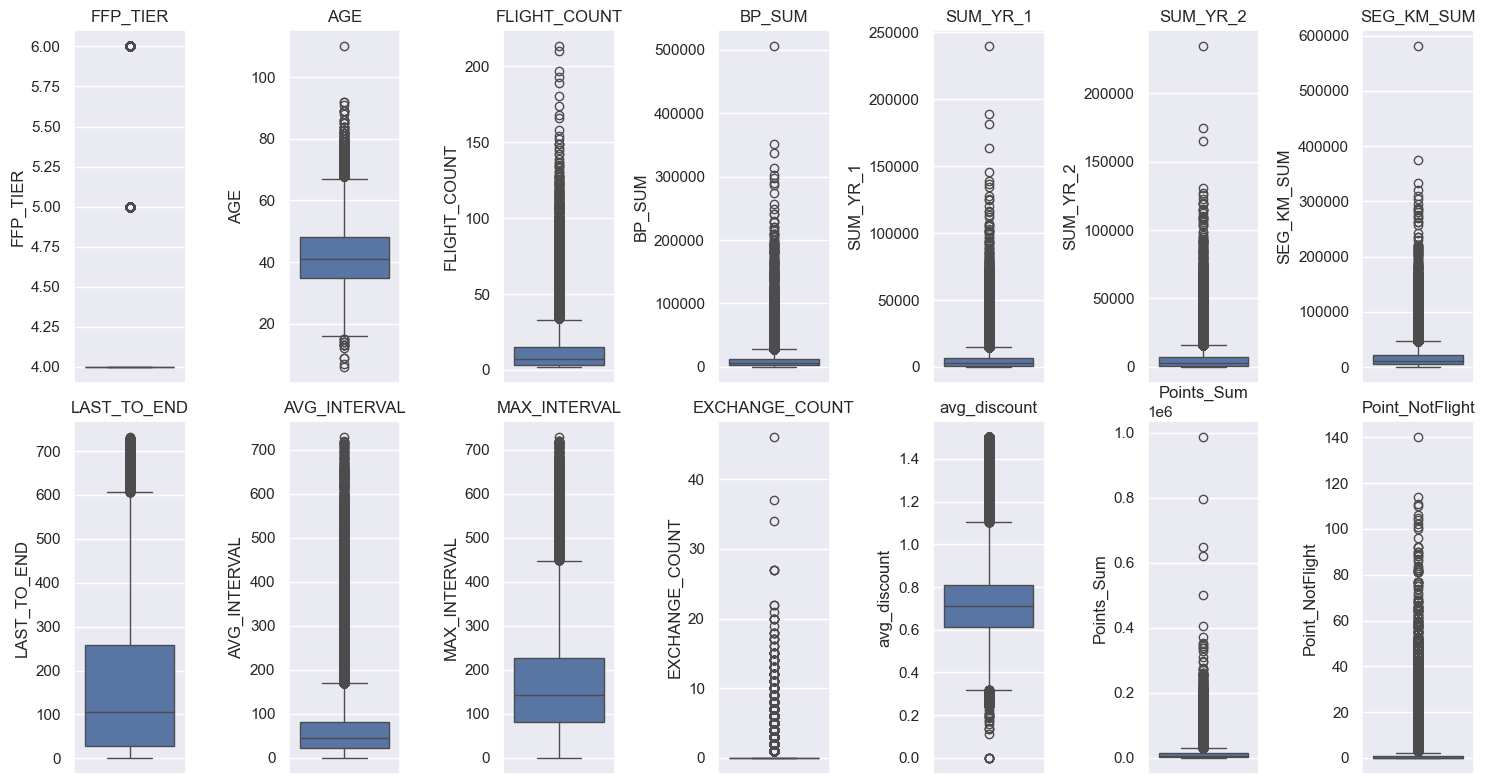

In [23]:
plt.figure(figsize=(15, 8))

for i in range(len(nums)):
    plt.subplot(2, len(nums)//2, i+1) 
    sns.boxplot(y=df[nums[i]], orient='v')
    plt.title(nums[i])

plt.tight_layout()
plt.show()

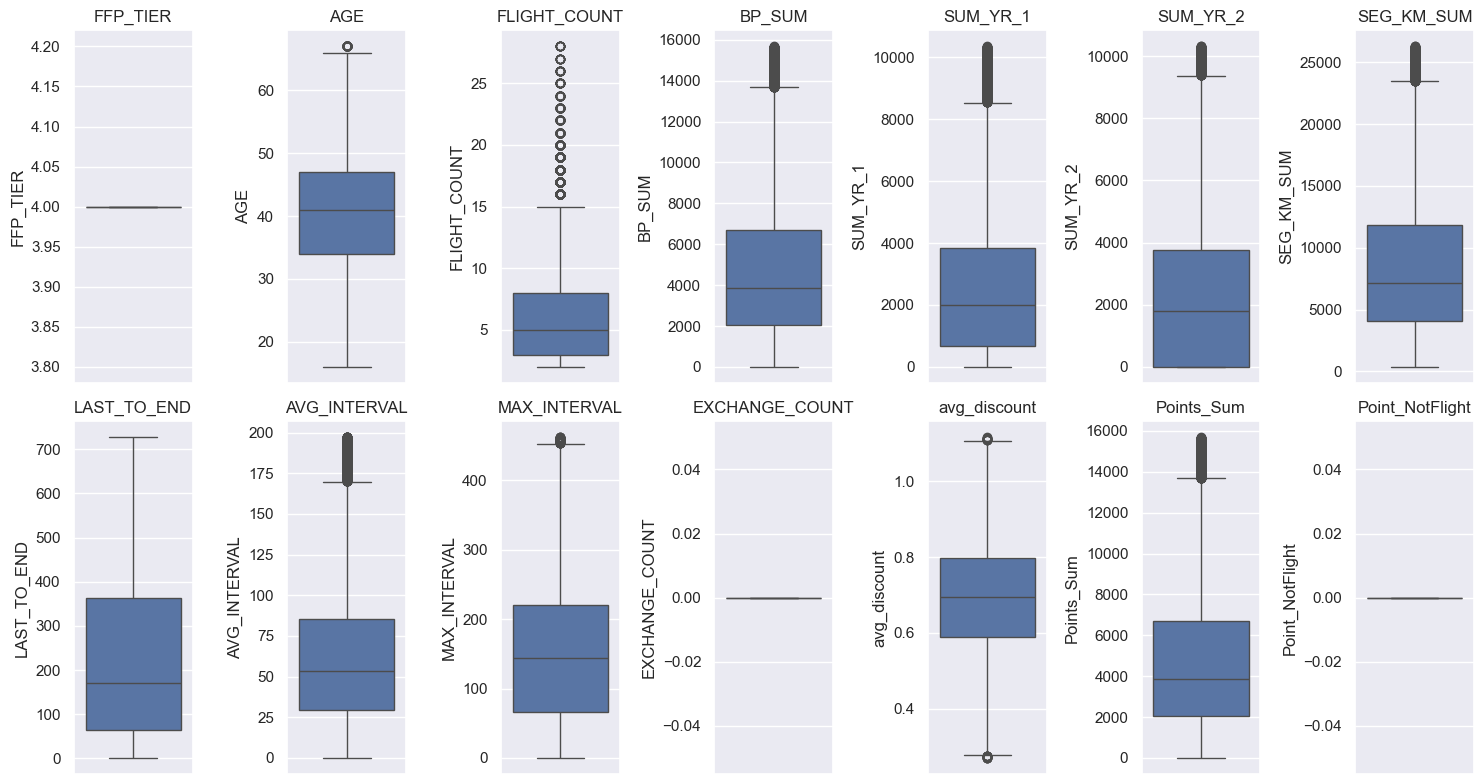

In [24]:
plt.figure(figsize=(15, 8))

for i in range(len(nums)):
    plt.subplot(2, len(nums)//2, i+1)
    sns.boxplot(y=df_filtered[nums[i]], orient='v')
    plt.title(nums[i])

plt.tight_layout()
plt.show()

##### Melakukaan Log Tranformation

In [25]:
print(nums)

['FFP_TIER', 'AGE', 'FLIGHT_COUNT', 'BP_SUM', 'SUM_YR_1', 'SUM_YR_2', 'SEG_KM_SUM', 'LAST_TO_END', 'AVG_INTERVAL', 'MAX_INTERVAL', 'EXCHANGE_COUNT', 'avg_discount', 'Points_Sum', 'Point_NotFlight']


C:\Users\asus\AppData\Local\Temp\ipykernel_8772\1137906114.py:4: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(df_filtered[nums[i]])


C:\Users\asus\AppData\Local\Temp\ipykernel_8772\1137906114.py:4: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(df_filtered[nums[i]])
C:\Users\asus\AppData\Local\Temp\ipykernel_8772\1137906114.py:4: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(df_filtered[nums[i]])


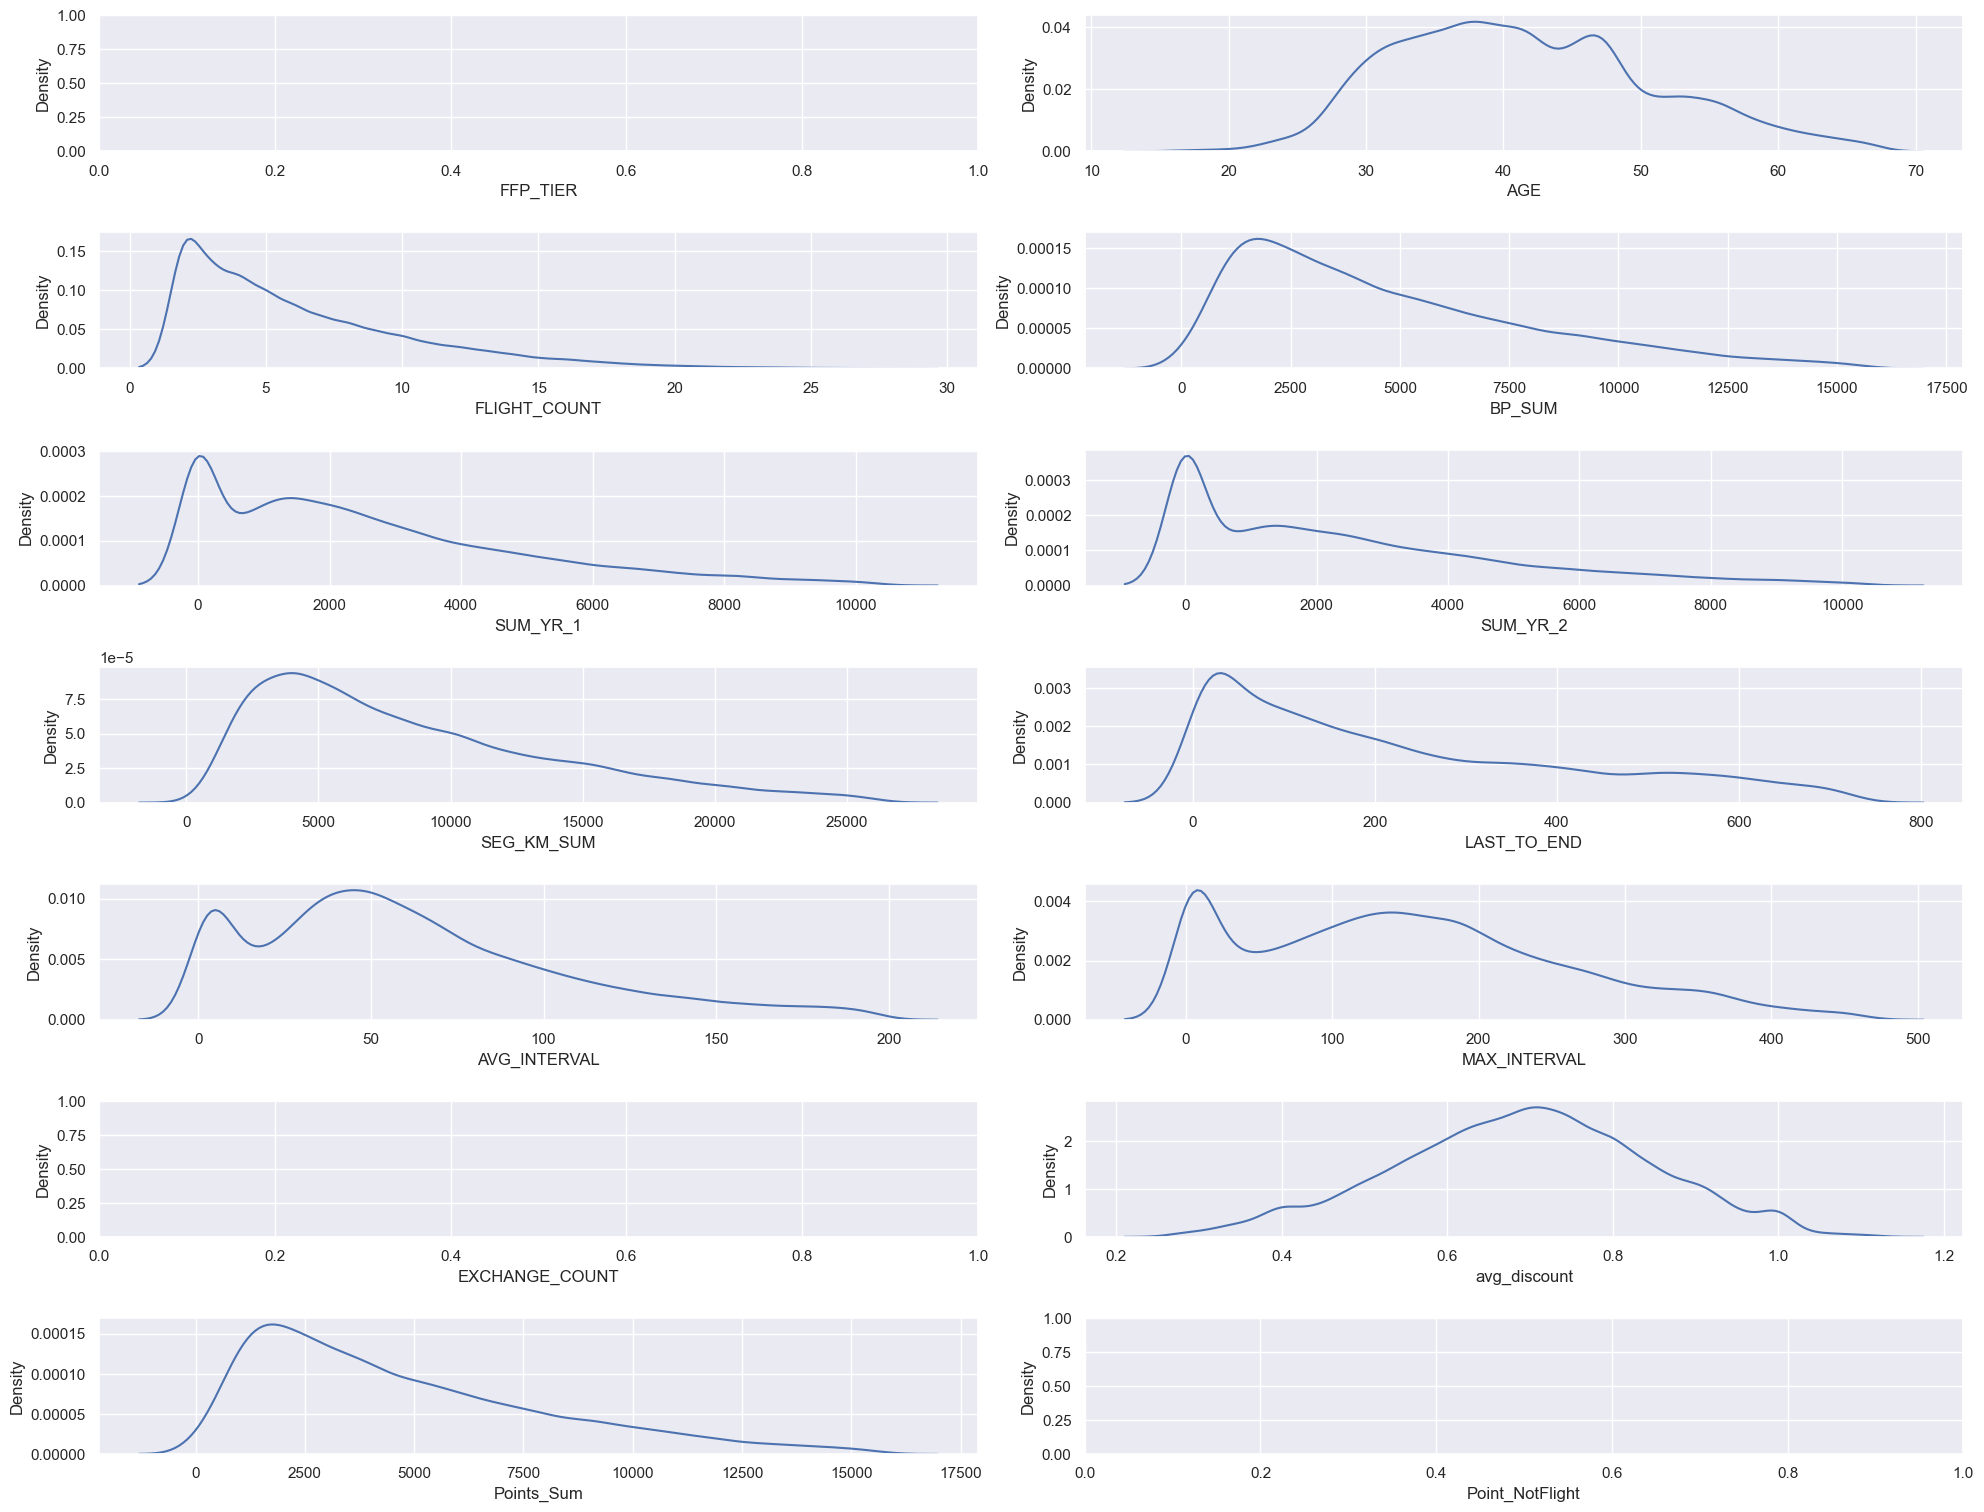

In [26]:
plt.figure(figsize=(20, 30))
for i in range(0, len(nums)):
    plt.subplot(len(nums), 2, i+1)
    sns.kdeplot(df_filtered[nums[i]])
    plt.tight_layout()

C:\Users\asus\AppData\Local\Temp\ipykernel_8772\512284426.py:6: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(df_filtered[nums[i]])
C:\Users\asus\AppData\Local\Temp\ipykernel_8772\512284426.py:6: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(df_filtered[nums[i]])


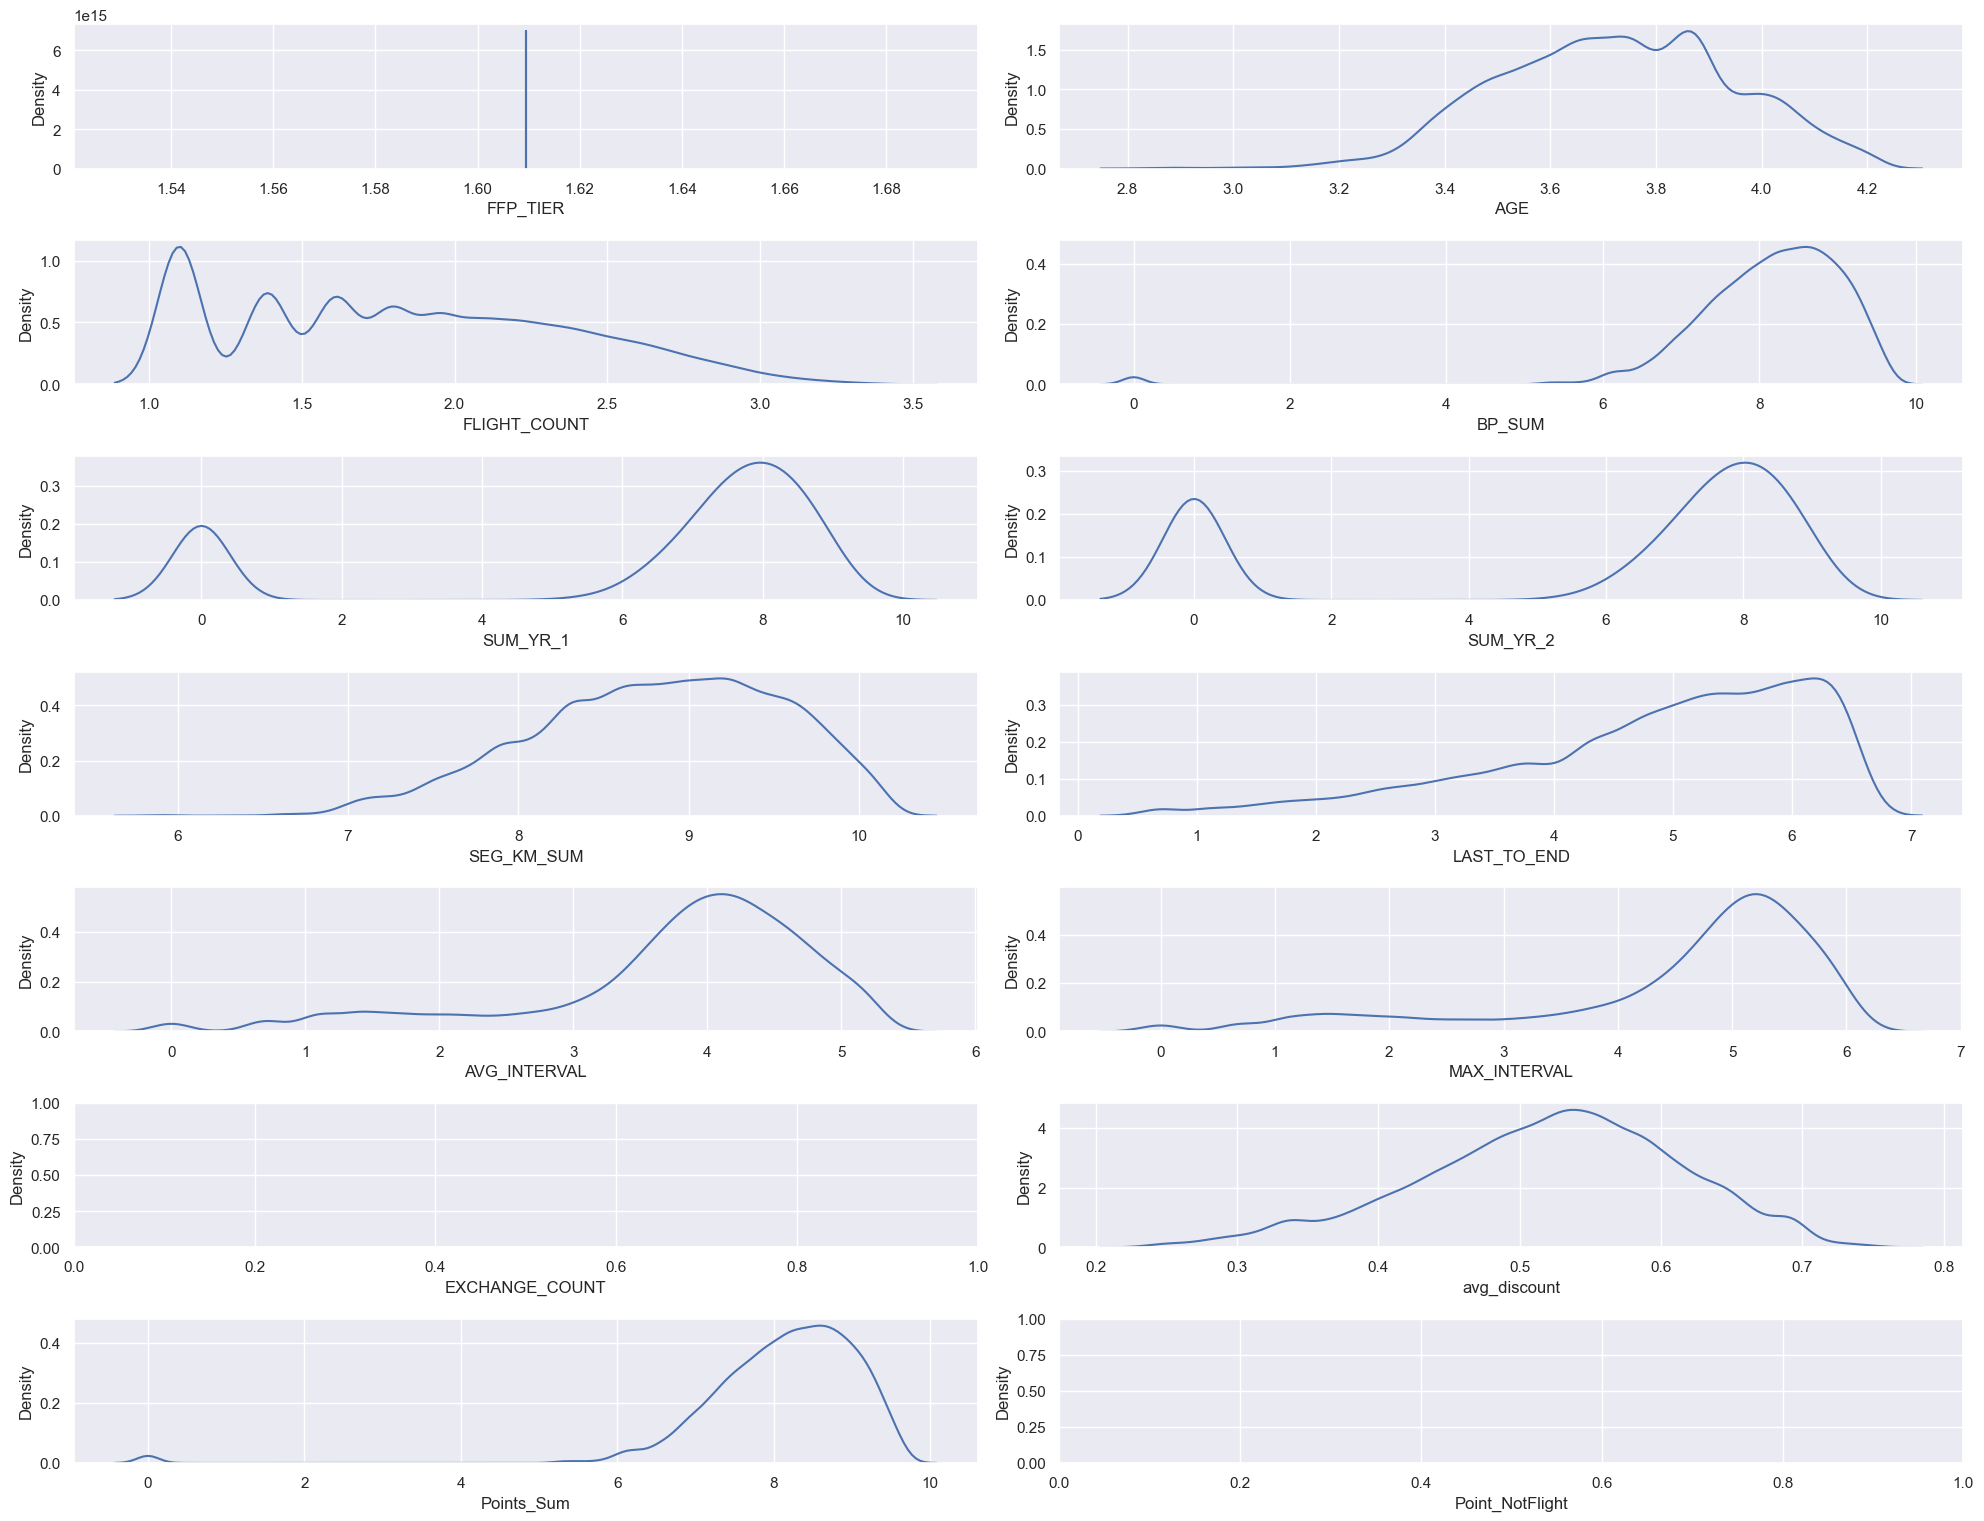

In [27]:
plt.figure(figsize=(20, 30))
for i in range(0, len(nums)):
    df_filtered[nums[i]] = np.log1p(df_filtered[nums[i]])

    plt.subplot(len(nums), 2, i+1)
    sns.kdeplot(df_filtered[nums[i]])
    plt.tight_layout()

#### Feature Engineering

##### Feature Encoding

Feature encoding akan dilakukan pada fitur kategorikal yaitu fitur 'Gender'agar fitur dapat direpresentasikan sebagai fitur numerik

In [28]:
# Membuat mapping dari kategori ke nilai numerik
gender_mapping = {'Male': 0, 'Female': 1}
df_filtered['GENDER'] = df_filtered['GENDER'].map(gender_mapping)

##### Recency

Kapan terakhir kali customer melakukan penerbangan (Dalam jumlah hari)

In [29]:
df_filtered['recency'] = (df_filtered['LOAD_TIME'] - df_filtered['LAST_FLIGHT_DATE']).dt.days

In [30]:
df_filtered['recency'].value_counts().reset_index()

,recency,count
0,3,206
1,0,198
2,4,191
3,1,189
4,11,185
...,...,...
721,403,4
722,716,4
723,687,4
724,724,3


##### Frequency

Frequency dapat dilihat dari kolom FLIGHT_COUNT

##### Monetary

In [31]:
df_filtered['monetary'] = df_filtered['SUM_YR_1'] + df_filtered['SUM_YR_2']

In [32]:
df_filtered['monetary'].value_counts().reset_index()

,monetary,count
0,0.000000,136
1,7.244942,31
2,7.139660,29
3,7.215975,29
4,7.560601,28
...,...,...
20316,15.674517,1
20317,16.081355,1
20318,15.286521,1
20319,8.953252,1


##### Binning

In [33]:
# Menggunakan pd.qcut untuk membuat bins pada kolom 'AGE'
df_filtered['age_bin'] = pd.qcut(df_filtered['AGE'], q=5, labels=False)

# Menggunakan pd.qcut untuk membuat bins pada kolom 'avg_discount'
df_filtered['avg_discount_level'] = pd.qcut(df_filtered['avg_discount'], q=5, labels=False)

# Membuat bins untuk mengelompokan jumlah poin 
df_filtered['Points_Sum_level'] = pd.qcut(df_filtered['Points_Sum'], q=5, labels=False)

# Membuat bins untuk mengelompokan jumlah penukaran poin 
df_filtered['exchange_count_bin'] = pd.cut(df_filtered['EXCHANGE_COUNT'], bins=4, labels=False)

##### Average Distance

In [34]:
df_filtered['AVG_DISTANCE'] = df_filtered['SEG_KM_SUM'] / df_filtered['FLIGHT_COUNT']

In [35]:
df_filtered.shape

(28303, 30)

In [36]:
df_filtered.head()

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight,recency,monetary,age_bin,avg_discount_level,Points_Sum_level,exchange_count_bin,AVG_DISTANCE
11525,2070,2005-02-03,2007-12-18,0,1.609438,beijing,beijing,CN,3.970292,2014-03-31,2.772589,9.642188,9.002947,9.185740,10.169422,2014-02-20,3.737670,3.899082,5.313206,0.0,0.562720,9.642188,0.0,39,18.188687,4,3,4,1,3.667844
11738,46939,2012-11-28,2013-01-12,0,1.609438,haerbin,heilongjiang,CN,3.663562,2014-03-31,2.639057,9.621125,9.133999,9.042986,10.129666,2014-03-05,3.332205,3.578879,5.379897,0.0,0.573901,9.621125,0.0,26,18.176985,1,3,4,1,3.838365
11886,10980,2004-11-30,2004-12-26,0,1.609438,huadushi,guangdongsheng,CN,4.025352,2014-03-31,2.772589,9.610525,9.221478,8.804625,10.155724,2014-02-24,3.637586,3.853183,5.117994,0.0,0.558498,9.610525,0.0,35,18.026103,4,3,4,1,3.662903
12003,35368,2011-08-21,2011-08-21,0,1.609438,shaoxing,zhejiang,CN,3.784190,2014-03-31,2.639057,9.529957,9.144628,8.781555,10.022292,2014-01-05,4.477337,3.962399,5.501258,0.0,0.614201,9.529957,0.0,85,17.926183,2,4,4,1,3.797679
12004,14876,2011-12-30,2012-01-08,1,1.609438,shanghaishi,shanghaishi,CN,3.367296,2014-03-31,2.833213,9.642642,7.923348,0.000000,10.167005,2013-08-26,5.393628,3.465736,4.442651,0.0,0.550367,9.642642,0.0,217,7.923348,0,3,4,1,3.588507


### Bagian A

In [37]:
df_selected = df_filtered[['AGE', 'FLIGHT_COUNT', 'recency', 'monetary', 'AVG_DISTANCE']]
df_selected

,AGE,FLIGHT_COUNT,recency,monetary,AVG_DISTANCE
11525,3.970292,2.772589,39,18.188687,3.667844
11738,3.663562,2.639057,26,18.176985,3.838365
11886,4.025352,2.772589,35,18.026103,3.662903
12003,3.784190,2.639057,85,17.926183,3.797679
12004,3.367296,2.833213,217,7.923348,3.588507
...,...,...,...,...,...
62962,3.465736,1.098612,490,6.732211,5.380239
62963,4.110874,1.098612,250,6.908755,5.380239
62964,3.713572,1.098612,414,6.722630,5.380239
62965,3.555348,1.098612,416,6.722630,5.380239


## Nomor 3

In [38]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import metrics

### Bagian A

In [39]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_selected)

In [40]:
df_scaled = pd.DataFrame(scaled_data, columns=df_selected.columns)

In [41]:
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

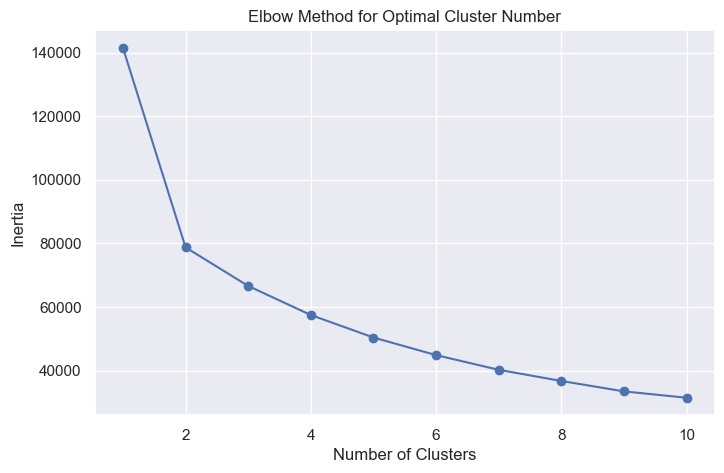

In [42]:
# Plot elbow method
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal Cluster Number')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

### Bagian B

In [50]:
optimal_cluster_number = 2
kmeans = KMeans(n_clusters=optimal_cluster_number, random_state=42, n_init=10)
labels = kmeans.fit_predict(df_scaled)

In [51]:
df_scaled['Cluster_Labels'] = labels
df_scaled

,AGE,FLIGHT_COUNT,recency,monetary,AVG_DISTANCE,Cluster_Labels
0,1.116458,1.720912,-0.958781,1.510716,-1.169781,0
1,-0.283468,1.477164,-1.024977,1.507872,-1.038164,0
2,1.367753,1.720912,-0.979149,1.471194,-1.173594,0
3,0.267082,1.477164,-0.724550,1.446905,-1.069568,0
4,-1.635635,1.831577,-0.052409,-0.984639,-1.231017,0
...,...,...,...,...,...,...
28298,-1.186351,-1.334771,1.337702,-1.274188,0.151924,1
28299,1.758079,-1.334771,0.115627,-1.231272,0.151924,1
28300,-0.055219,-1.334771,0.950712,-1.276517,0.151924,1
28301,-0.777359,-1.334771,0.960896,-1.276517,0.151924,1


In [52]:
df_scaled.to_csv('../dataset/result.csv')

### Bagian C

In [53]:
pca = PCA(n_components=2)
data_pca = pca.fit_transform(df_scaled)

In [54]:
df_pca = pd.DataFrame(data_pca, columns=['PC1', 'PC2'])
df_pca['Cluster'] = labels

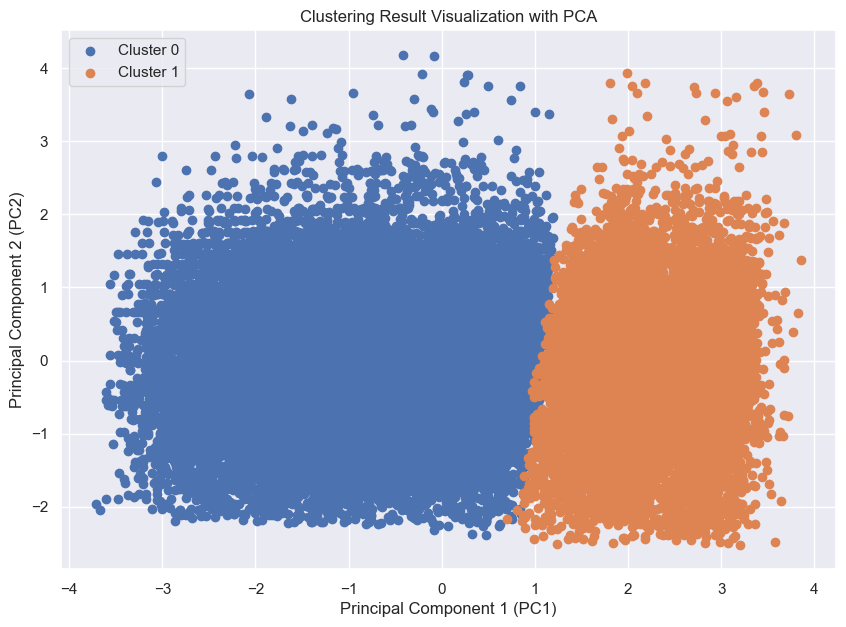

In [55]:
plt.figure(figsize=(10, 7))
for cluster in range(optimal_cluster_number):
    cluster_data = df_pca[df_pca['Cluster'] == cluster]
    plt.scatter(cluster_data['PC1'], cluster_data['PC2'],
                label=f'Cluster {cluster}')

plt.title('Clustering Result Visualization with PCA')
plt.xlabel('Principal Component 1 (PC1)')
plt.ylabel('Principal Component 2 (PC2)')
plt.legend()
plt.show()

## Nomor 4

### Bagian A

In [49]:
# Ini mmas ramlan

### Bagian B

### Bagian C